<a href="https://colab.research.google.com/github/Zactyz/AI-Repo/blob/master/HW_3/REVISION_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#REVISION - Homework 3 - Zachary Zimmerman

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import array as ar

def get_random_data(w, b, mu, sigma, m):

  data = np.empty([m, 2])
  labels = np.empty([m, 1])

  for i in range(0, m-1):
    n = np.random.default_rng().normal(mu, sigma)
    c = np.random.randint(0, 2)
    x_1 = np.random.default_rng().uniform(0, 1)
    x_2 = w * x_1 + b + (-1) ** c * n
    data[i, 0] = x_1
    data[i, 1] = x_2
    labels[i] = c

  return labels, data;

def display_random_data(labels, data):
  for i in range(0, len(data)):
    if ((labels[i] == 0)):
      plt.plot(data[i, 0], data[i, 1], 'bo')
    else:
      plt.plot(data[i, 0], data[i, 1], 'ro')

## Below is the sample input and output (values used for all following sections)

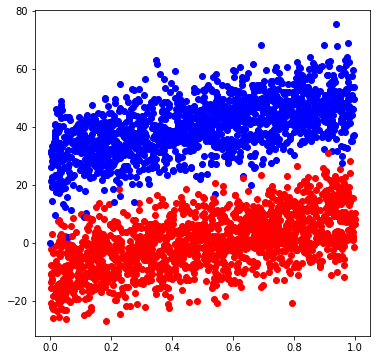

In [3]:
w = 20
b = 10
mu = 20
sigma = 8
m = 3000
plt.subplots(figsize=(6,6))
labels, data = get_random_data(w, b, mu, sigma, m)
display_random_data(labels, data);
# run a few times with different numbers if the data does not scatter correctly (may be caused by an outlier)

##Split the data/labels into a training set (80%) and a test set (20%)

In [0]:
def split_data(labels, data):
  training = int(0.8 * len(data))
  test = int(0.2 * len(data))

  data_training = np.empty([training, 2])
  data_test = np.empty([test, 2])
  labels_training = np.empty([training, 1])
  labels_test = np.empty([test, 1])

  for i in range(0, len(data)):
    if (i<training):
      data_training[i] = data[i]
      labels_training[i] = labels[i]
    else:
      data_test[len(data) - i - 1] = data[i]
      labels_test[len(data) - i - 1] = labels[i]


  return data_training, data_test, labels_training, labels_test

data_training, data_test, labels_training, labels_test = split_data(labels, data)

##Keras Implementation

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%tensorflow_version 2.x

features = 2
output = 1
learning_rate=.01

model = keras.Sequential()
model.add(tf.keras.layers.Dense(output, input_dim=features, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer)

history = model.fit(data_training, labels_training, epochs=40)

weights = model.get_weights()

print("")
print("weight shape: ", weights[0].shape)
print("bias term shape: ", weights[1].shape)

Epoch 1/40
75/75 [==============================] - 0s 1ms/step - loss: 0.4063
Epoch 2/40
75/75 [==============================] - 0s 1ms/step - loss: 0.1647
Epoch 3/40
75/75 [==============================] - 0s 1ms/step - loss: 0.1189
Epoch 4/40
75/75 [==============================] - 0s 1ms/step - loss: 0.0928
Epoch 5/40
75/75 [==============================] - 0s 1ms/step - loss: 0.0766
Epoch 6/40
75/75 [==============================] - 0s 1ms/step - loss: 0.0654
Epoch 7/40
75/75 [==============================] - 0s 1ms/step - loss: 0.0570
Epoch 8/40
75/75 [==============================] - 0s 1ms/step - loss: 0.0513
Epoch 9/40
75/75 [==============================] - 0s 1ms/step - loss: 0.0463
Epoch 10/40
75/75 [==============================] - 0s 1ms/step - loss: 0.0421
Epoch 11/40
75/75 [==============================] - 0s 1ms/step - loss: 0.0396
Epoch 12/40
75/75 [==============================] - 0s 1ms/step - loss: 0.0371
Epoch 13/40
75/75 [==============================

##Obtaining the separating line.
In order to obtain this line, we solve for x_2 when the Sigmoid function is 1/2, based on the equation w1 x1 + w2 x2 + b = 0,

The separating line would therefore be: **x_2 = -(w1 x1 + b) / w2**, with w1 and w2 coming from the first array, and the bias term, b, coming from the second

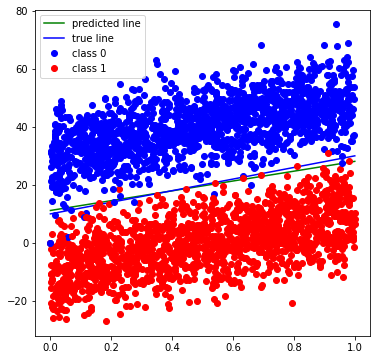

In [7]:
line = np.linspace(0, 1)

# we will use our equation for the line, based on the weights
predictedLine = -((weights[0][0] * line) + weights[1]) / weights[0][1]
trueLine = w * line + b

plt.subplots(figsize=(6,6))
plt.plot(line, predictedLine, color='green', label='predicted line')
plt.plot(line, trueLine, color='blue', label='true line')
plt.plot(0, 'bo', label='class 0')
plt.plot(0, 'ro', label='class 1')

for i in range(0, len(data)):
    if ((labels[i] == 0)):
      plt.plot(data[i, 0], data[i, 1], 'bo')
    else:
      plt.plot(data[i, 0], data[i, 1], 'ro')

plt.legend()

##Heatmap

Source: https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap-with-matplotlib/54088910#54088910

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


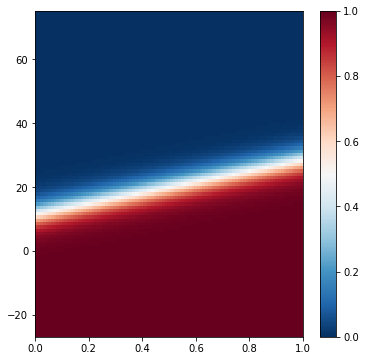

In [8]:
import math
import seaborn as sb
import pandas as pd

def sigmoid(z):
    res = 1 / (1 + math.exp(-z)) 
    return res

def make_prediction(w, b, x):
    return sigmoid(np.add(np.dot(w.T, x), b))

x, y = np.meshgrid(np.linspace(0,1, num=100), np.linspace(min(data.T[1]), max(data.T[1]), num=100))
xv = x[0]
yv = [y[i][0] for i in range(len(y))]

d = np.array([xv,yv]).T

map = np.zeros((100,100))

for k in range(len(xv)):
    for j in range(len(yv)):
        map[j][k] = make_prediction(weights[0], weights[1], [xv[k], yv[j]])

fig, ax = plt.subplots(figsize=(6,6))
cmap = plt.get_cmap('RdBu_r')
c = ax.pcolormesh(xv, yv, map, cmap=cmap)
fig.colorbar(c, ax=ax)
plt.show()

##Logistic Regression

###Train data - use gradient decent to update weights

In [9]:
from tqdm import trange

new_weights = np.random.rand(2)
b = np.random.randint(1)
history = []

prog = trange(100, leave=True)
j = len(data)
        
for e in prog:
    for k in range(j):
        a = sigmoid(np.dot(new_weights.T, data[k]) + b)
        y = labels[k]   
        
        new_weights[0] -= 0.01 * ((a - y) * data[k][0])
        new_weights[1] -= 0.01 * ((a - y) * data[k][1])
        b -= 0.1 * (a - y)

        history.append([new_weights[0], new_weights[1], b])

100%|██████████| 100/100 [00:10<00:00,  9.51it/s]


###Plot trained model

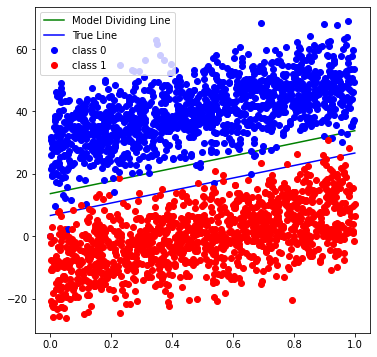

In [10]:
line = np.linspace(0, 1)

predictedLine = -((new_weights[0] * line) + b) / new_weights[1]
trueLine = line * w + b

fig, plt.subplots(figsize=(6,6))
plt.plot(line, predictedLine, color='green', label='Model Dividing Line')
plt.plot(line, trueLine, color='blue', label='True Line')

for i in range(0, len(data_training)):
  if ((labels_training[i] == 0)):
    plt.plot(data_training[i, 0], data_training[i, 1], 'bo')
  else:
    plt.plot(data_training[i, 0], data_training[i, 1], 'ro')

plt.plot(0, 'bo', label='class 0')
plt.plot(0, 'ro', label='class 1')   
    
plt.legend()

###Heatmap

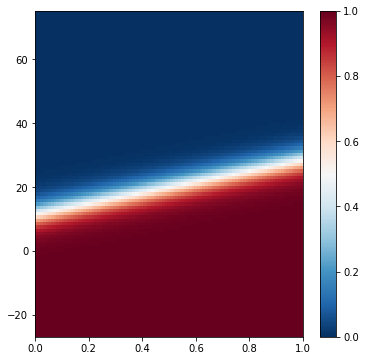

In [11]:
x, y = np.meshgrid(np.linspace(0,1, num=100), np.linspace(min(data.T[1]), max(data.T[1]), num=100))
xv = x[0]
yv = [y[i][0] for i in range(len(y))]

d = np.array([xv,yv]).T

map = np.zeros((100,100))

for k in range(len(xv)):
    for j in range(len(yv)):
        map[j][k] = make_prediction(weights[0], weights[1], [xv[k], yv[j]])

fig, ax = plt.subplots(figsize=(6,6))
cmap = plt.get_cmap('RdBu_r')
c = ax.pcolormesh(xv, yv, map, cmap=cmap)
fig.colorbar(c, ax=ax)
plt.show()

###Compute Testing Loss

In [12]:
loss = 0           
for i in range(len(data_test)):
    a = sigmoid(np.dot(new_weights.T, data_test[i]) + b)
    loss += (-labels_test[i] * np.log(a)) - ((1-labels_test[i]) * np.log(1-a))
        
print('Binary cross entropy loss: ', loss)

Binary cross entropy loss:  [25.9387132]
